In [16]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [17]:
d0 = 1
P0_d0 = -40
gamma = 2.0
R = 50

anchor_nodes = np.array([
    [0, 0],
    [50, 0],
    [0, 50],
    [50, 50]
])

uav_trajectory = np.array([
    [10, 10],
    [110, 10],
    [110, 110],
    [10, 110],
    [10, 10]  
])

rssi_measurements = np.array([-50, -52, -48, -51])

In [18]:
def estimate_distance(rssi):
    return d0 * 10 ** ((P0_d0 - rssi) / (10 * gamma))

distances = np.array([estimate_distance(rssi) for rssi in rssi_measurements])

Anchor Nodes:
[[ 0  0]
 [50  0]
 [ 0 50]
 [50 50]]
Measured RSSI:
[-50 -52 -48 -51]
Estimated Distances:
[3.16227766 3.98107171 2.51188643 3.54813389]
Estimated UN Position:
[24.65587044 25.20117151]


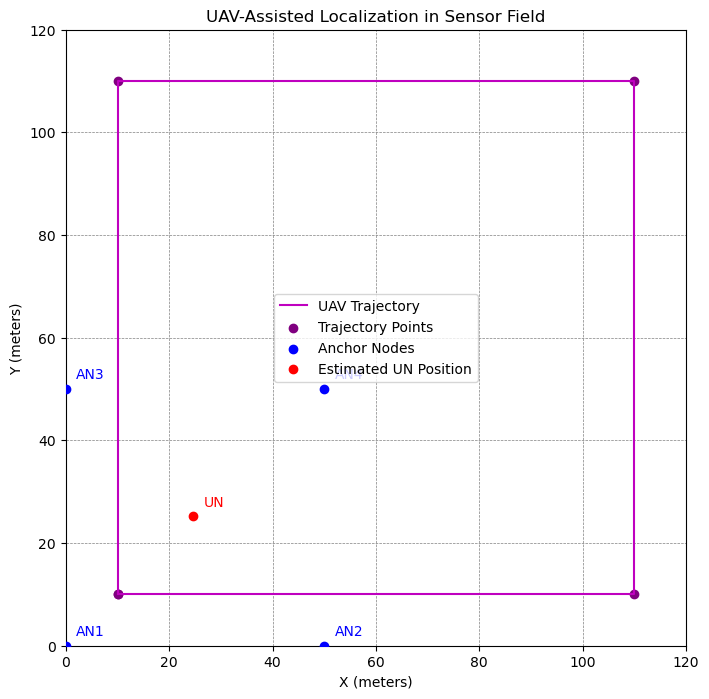

In [19]:
def localization_error(un_pos, anchors, distances):
    error = 0
    for i in range(len(anchors)):
        estimated_distance = np.linalg.norm(un_pos - anchors[i])
        error += (estimated_distance - distances[i]) ** 2
    return error

initial_guess = np.array([25, 25])

result = minimize(localization_error, initial_guess, args=(anchor_nodes, distances), method='BFGS')

un_position = result.x

print("Anchor Nodes:")
print(anchor_nodes)
print("Measured RSSI:")
print(rssi_measurements)
print("Estimated Distances:")
print(distances)
print("Estimated UN Position:")
print(un_position)

plt.figure(figsize=(8, 8))

plt.xlim(0, 120)
plt.ylim(0, 120)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

plt.plot(uav_trajectory[:, 0], uav_trajectory[:, 1], 'm-', label="UAV Trajectory")
plt.scatter(uav_trajectory[:, 0], uav_trajectory[:, 1], color='purple', label="Trajectory Points")

plt.scatter(anchor_nodes[:, 0], anchor_nodes[:, 1], color='blue', label="Anchor Nodes", zorder=5)
for i, (x, y) in enumerate(anchor_nodes):
    plt.text(x + 2, y + 2, f"AN{i+1}", color="blue")

plt.scatter(un_position[0], un_position[1], color='red', label="Estimated UN Position", zorder=5)
plt.text(un_position[0] + 2, un_position[1] + 2, "UN", color="red")

plt.title("UAV-Assisted Localization in Sensor Field")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.legend()
plt.show()
